In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression

In [2]:
iris_Data = load_iris()
iris_Data["target_names"]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df = pd.DataFrame(np.c_[iris_Data["data"],iris_Data["target"]],columns=iris_Data["feature_names"]+["target"])
df["target"] = df["target"].apply(lambda x: 1 if x == 0 else 0)

In [4]:
stratSplit = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index,test_index in stratSplit.split(df[iris_Data["feature_names"]],df["target"]):
    X_train = df[iris_Data["feature_names"]].iloc[train_index]
    X_test = df[iris_Data["feature_names"]].iloc[test_index]

    Y_train = df["target"].iloc[train_index]
    Y_test = df["target"].iloc[test_index]


In [5]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
y_test_pred = log_clf.predict(X_test)

In [6]:
print(log_clf.score(X_test,Y_test))

1.0


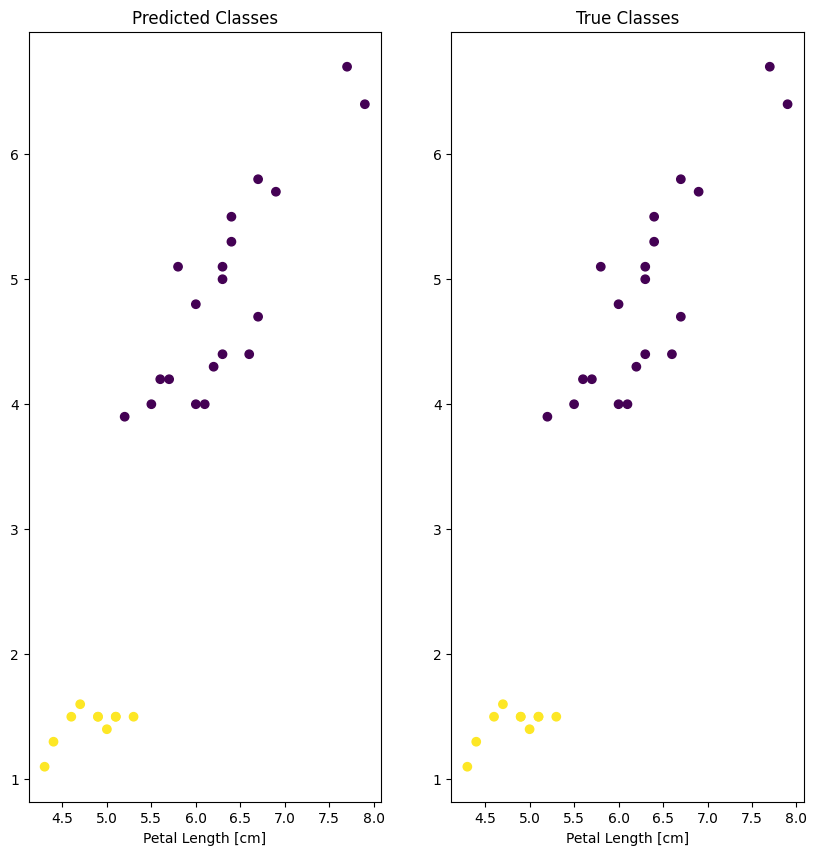

In [9]:
fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_title("Predicted Classes")
ax1.scatter(X_test['sepal length (cm)'],X_test['petal length (cm)'], c = y_test_pred)#
ax1.set_xlabel("Sepal Length [cm]")
ax1.set_xlabel("Petal Length [cm]")

ax2 = fig.add_subplot(122)
ax2.set_title("True Classes")
ax2.scatter(X_test['sepal length (cm)'],X_test['petal length (cm)'], c = Y_test)#
ax2.set_xlabel("Sepal Length [cm]")
ax2.set_xlabel("Petal Length [cm]")

plt.show()

/home/jack/Code/DevTraining/MachineLearning/.venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


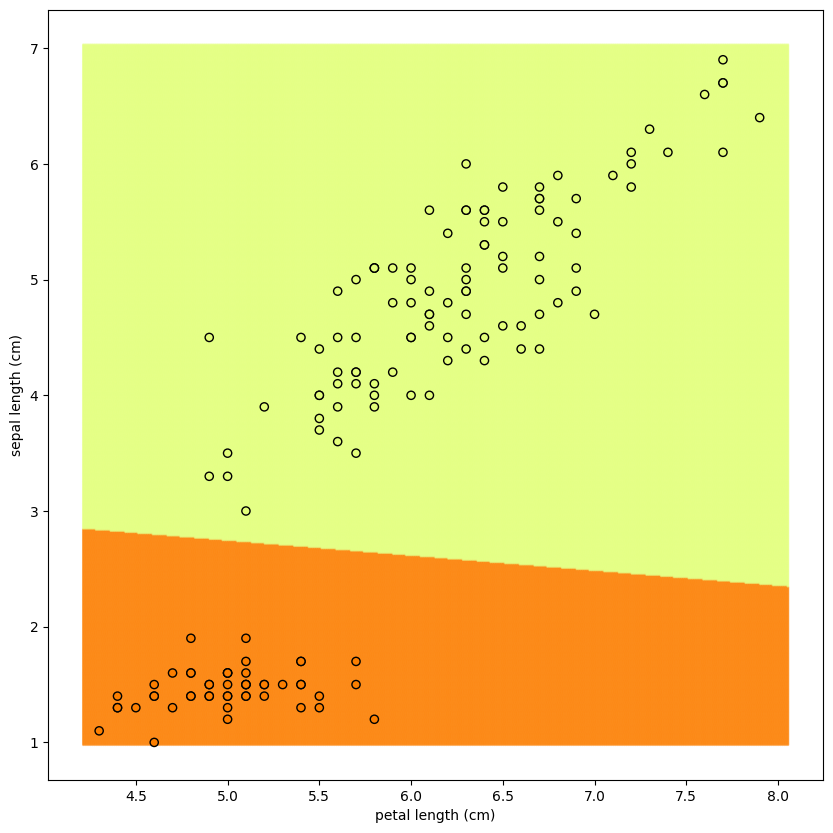

In [14]:
def make_meshgrid(x,y,sep=0.01):

    xMin = min(x) - min(x)/50
    xMax = max(x) + max(x)/50

    yMin = min(y) - min(y)/50
    yMax = max(y) + max(y)/50

    return np.meshgrid(np.arange(xMin,xMax,sep),np.arange(yMin,yMax,sep))

df = pd.DataFrame(np.c_[iris_Data["data"],iris_Data["target"]],columns=iris_Data["feature_names"]+["target"])
df["target"] = df["target"].apply(lambda x: 1 if x == 0 else 0)

fig = plt.figure(figsize=(10,10))

xCol = "sepal length (cm)"
yCol = "petal length (cm)"
log_clf.fit(df[[xCol,yCol]], df["target"])
y_test_pred = log_clf.predict(df[[xCol,yCol]])

xx, yy = make_meshgrid(df[xCol], df[yCol], sep=0.01)

res = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c=res, s=1, cmap=plt.cm.Wistia, alpha=0.5)

plt.scatter(df[xCol],df[yCol], c = df["target"], cmap=plt.cm.Wistia, edgecolors="black", s=35)
plt.ylabel(xCol)
plt.xlabel(yCol)

plt.show()

/home/jack/Code/DevTraining/MachineLearning/.venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


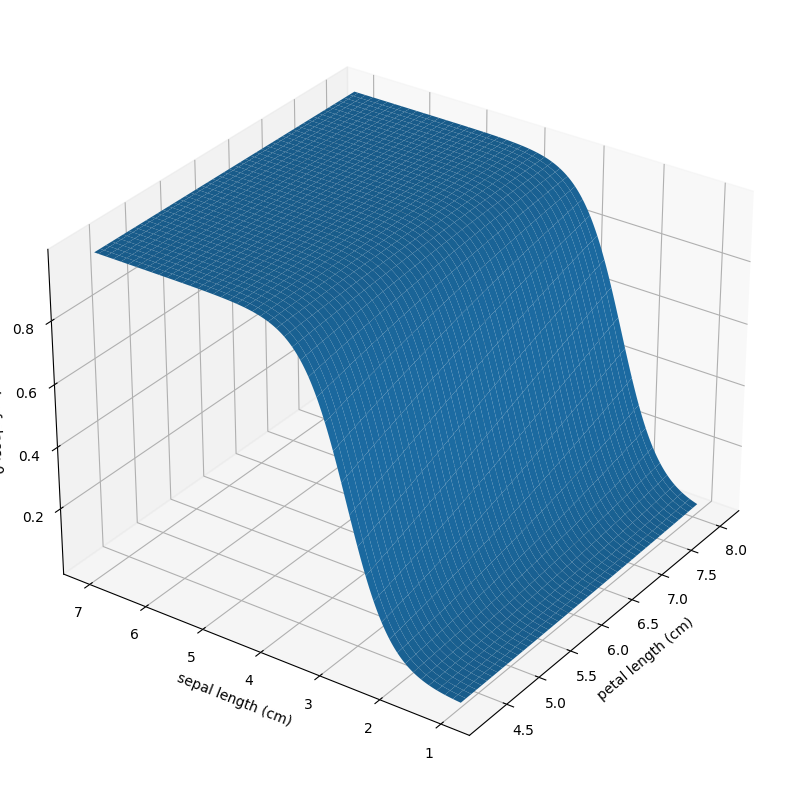

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
classNum = 0
ax = fig .add_subplot(111,projection="3d")

z = log_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
ax.plot_surface(xx,yy,z[:,classNum].reshape(xx.shape[0],yy.shape[1]))

ax.set_ylabel(xCol)
ax.set_xlabel(yCol)
ax.set_zlabel("prob of class: {}".format(classNum))
ax.view_init(30,-145)
plt.show()
